<h1>Importing Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import math
import pickle

<h1>Loading Dataset</h1>

In [2]:
data=pd.read_csv('dataset.csv')

<h1>Exploratory Data Analysis</h1>
-Gettings insights about the data.

-Using visualization and descriptive statistics to understand the overall structure and characteristics of the data. We will look for patterns and trends, and identify any unsual observations. 

Here, there are 6019 rows and 11 columns. 

In [3]:
data.shape

(6019, 12)

Getting information of the data like null values, counts, and data types.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   object 
 7   Engine             5983 non-null   object 
 8   Power              5983 non-null   object 
 9   Seats              5977 non-null   float64
 10  Price              6019 non-null   object 
 11  New_Price          824 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 564.4+ KB


It shows the statistical computation on the data set like Mean, Standard Deviation, and so on.

In [5]:
data.describe()

,Year,Kilometers_Driven,Seats
count,6019.000000,6.019000e+03,5977.000000
mean,2013.358199,5.873838e+04,5.278735
std,3.269742,9.126884e+04,0.808840
min,1998.000000,1.710000e+02,0.000000
25%,2011.000000,3.400000e+04,5.000000
50%,2014.000000,5.300000e+04,5.000000
75%,2016.000000,7.300000e+04,5.000000
max,2019.000000,6.500000e+06,10.000000


Extracting dependent and independent variables.

x being independent and y being dependent variable.

In [6]:
x = data.iloc[:, :-2]

In [7]:
x

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0
6016,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0
6017,Maruti Wagon R VXI,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0


In [8]:
y = data.iloc[:, 10]

In [9]:
y

0        $2,113.53 
1       $15,096.62 
2        $5,434.78 
3        $7,246.38 
4       $21,425.12 
           ...     
6014     $5,736.72 
6015     $4,830.92 
6016     $3,502.42 
6017     $3,200.48 
6018     $3,019.32 
Name: Price, Length: 6019, dtype: object

<h1>Data Preprocessing</h1>

<h2>Data Cleaning</h2>

<h3>Handling the missing values</h3>



In [10]:
data.isnull().sum() #Checking null values

Name                    0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
Price                   0
New_Price            5195
dtype: int64

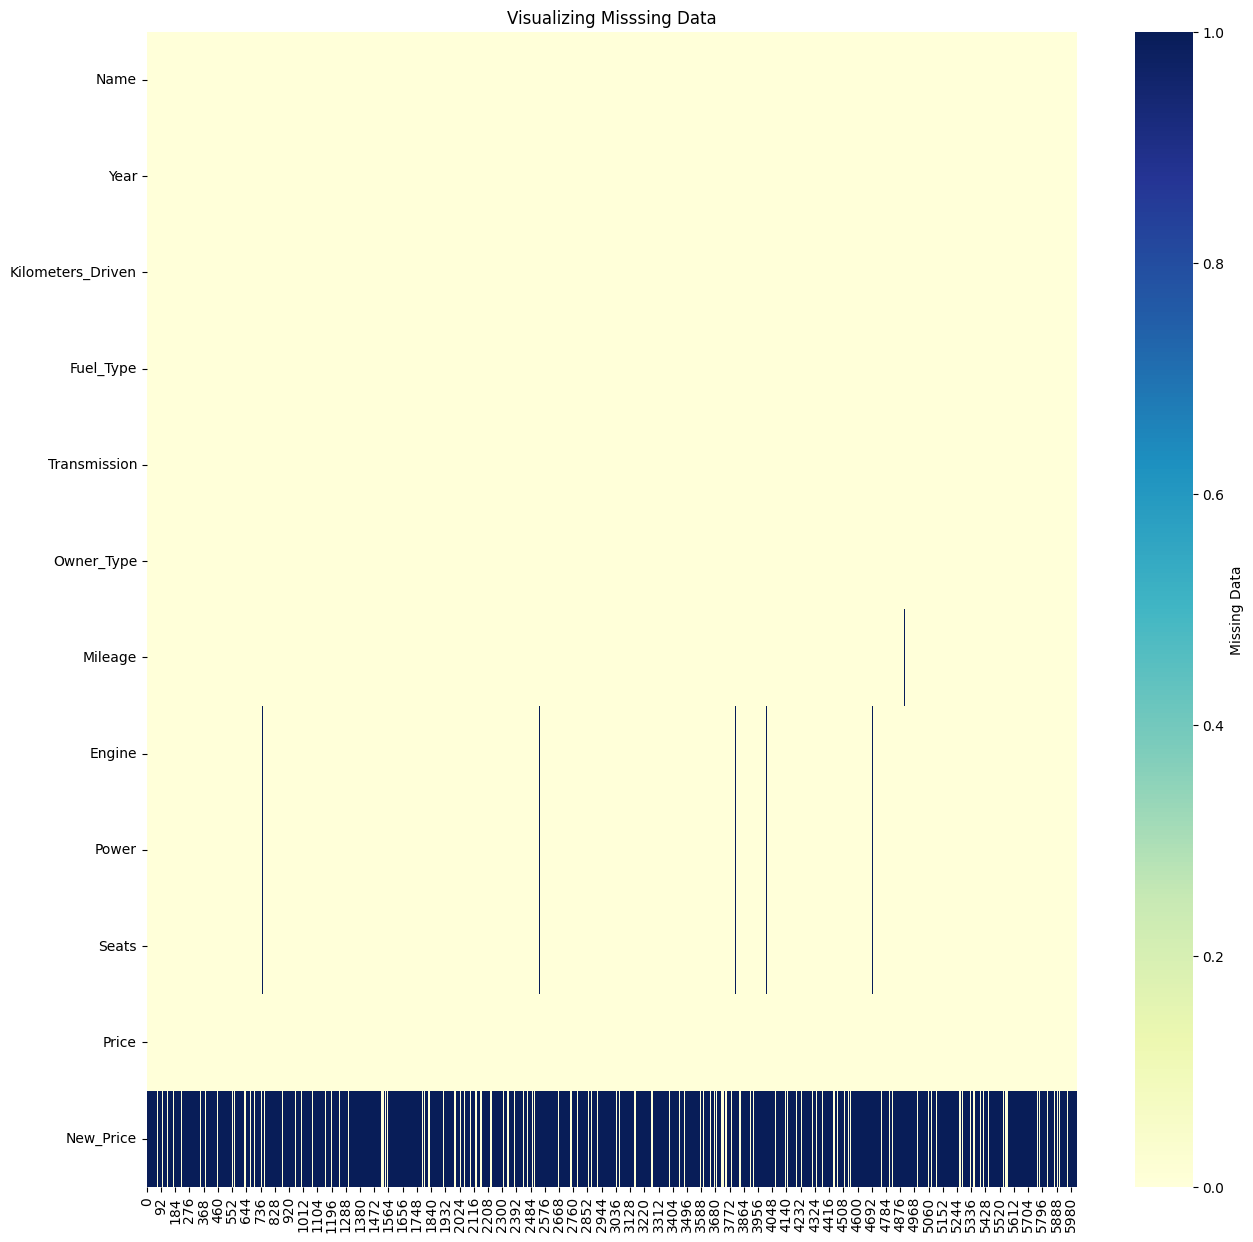

In [11]:
plt.figure(figsize=(15, 15))
plt.title("Visualizing Misssing Data")
sns.heatmap(data.isna().transpose(), cmap="YlGnBu", cbar_kws={"label": "Missing Data"})
plt.show()

<h4>Dropping New_Price</h4>

As the New_Price column has maximum null values, it is better that we drop this column.

In [12]:
data.drop(['New_Price'],axis = 1, inplace = True)

In [13]:
data

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,"$2,113.53"
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,"$15,096.62"
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,"$5,434.78"
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,"$7,246.38"
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,"$21,425.12"
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,"$5,736.72"
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,"$4,830.92"
6016,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,"$3,502.42"
6017,Maruti Wagon R VXI,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,"$3,200.48"


In [14]:
data.isnull().sum() #checking null values after dropping column New_Price

Name                  0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

<h4>Removing the unit of Mileage, Engine, and Power</h4>

In [15]:
data['Mileage']=data['Mileage'].map(lambda x: str(x).strip().split(" ")[0])
data['Engine']=data['Engine'].map(lambda x: str(x).strip().split(" ")[0])
data['Power']=data['Power'].map(lambda x: str(x).strip().split(" ")[0])

<h4>There's null string in Engine, Mileage and Power Column. Thus, changing null to NaN </h4>

In [16]:
data["Engine"] = pd.to_numeric(data["Engine"], errors = 'coerce')
data["Power"] = pd.to_numeric(data["Power"], errors = 'coerce')
data["Mileage"] = pd.to_numeric(data["Mileage"], errors = 'coerce')

These are the information of the data regarding the mean, standard deviation, etc.

<h4>Still there's null values in Mileage, Engine, Power, and Seats. So we calculate the mean to replace these missing values with mean value. Before replacing with mean, let's visualize the data in Mileage, Engine, Power, and Seats.</h4>



<h3>Visualizing Numerical Features using Distribution Plot</h3>

1. Mileage

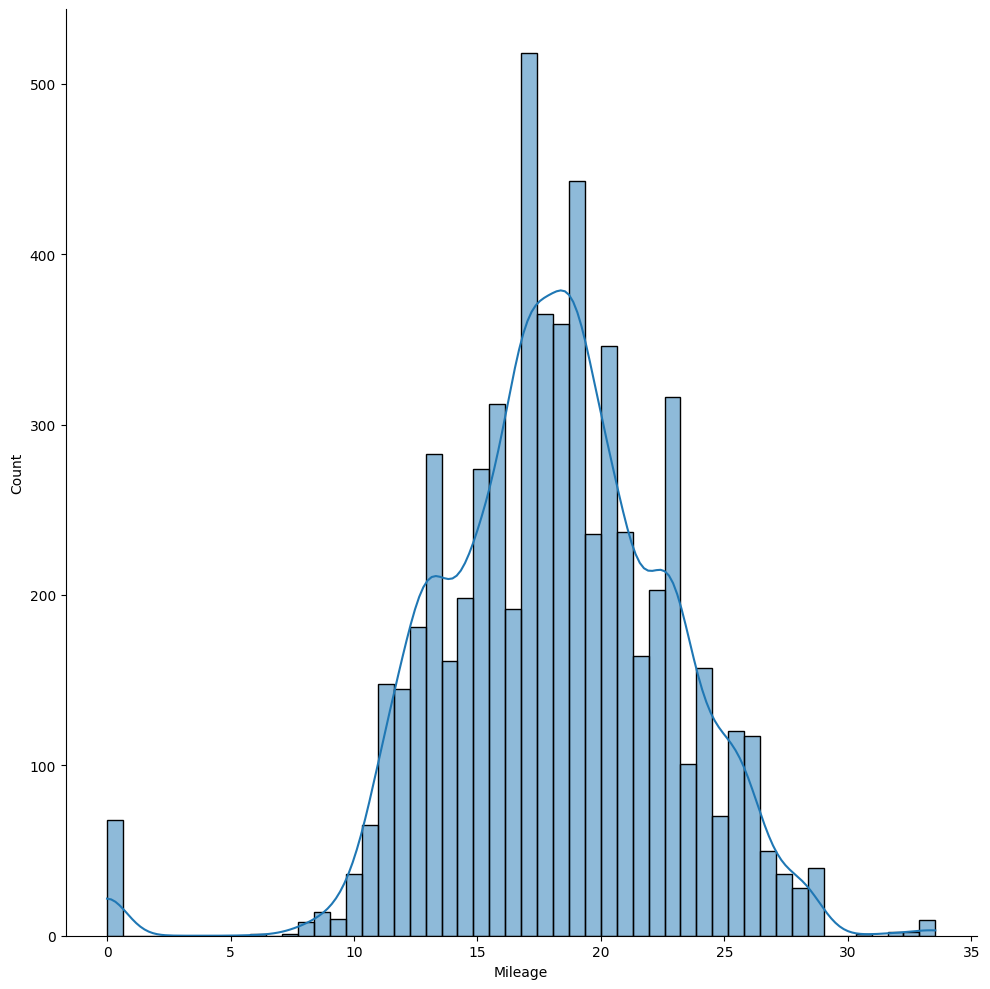

In [17]:
sns.displot(data=data.Mileage, kde=True, height=10)
plt.show()

Zero Skewed

2. Engine

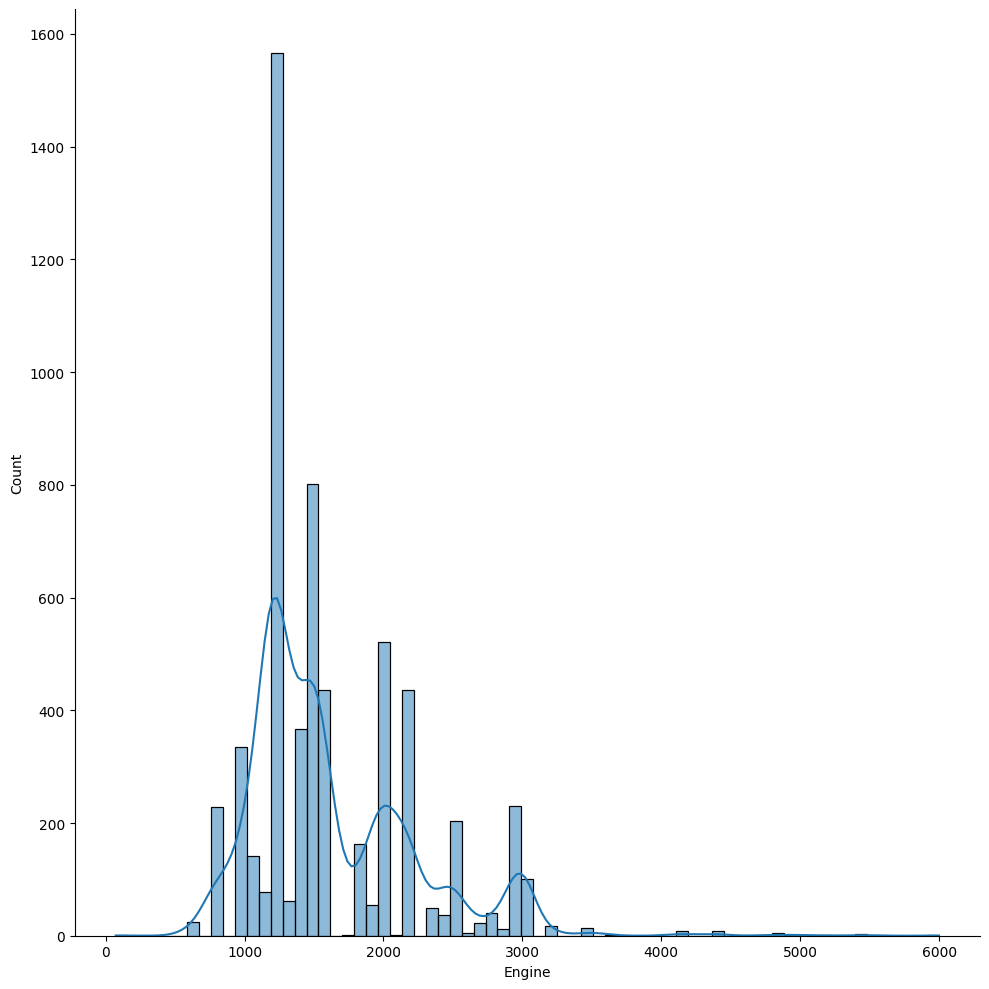

In [18]:
sns.displot(data=data.Engine, kde=True, height=10)
plt.show()

Right skewed

3. Power

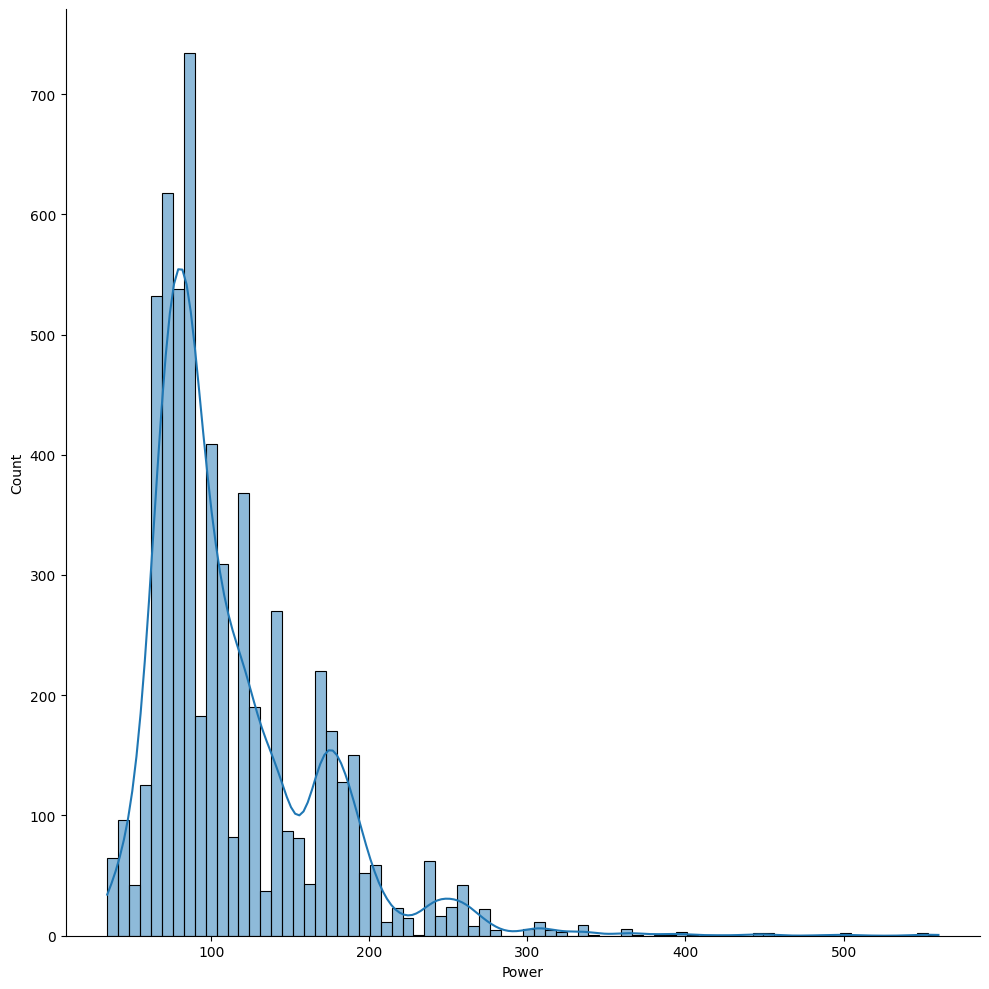

In [19]:
sns.displot(data=data.Power, kde=True, height=10)
plt.show()

Right Skewed

4. Seats

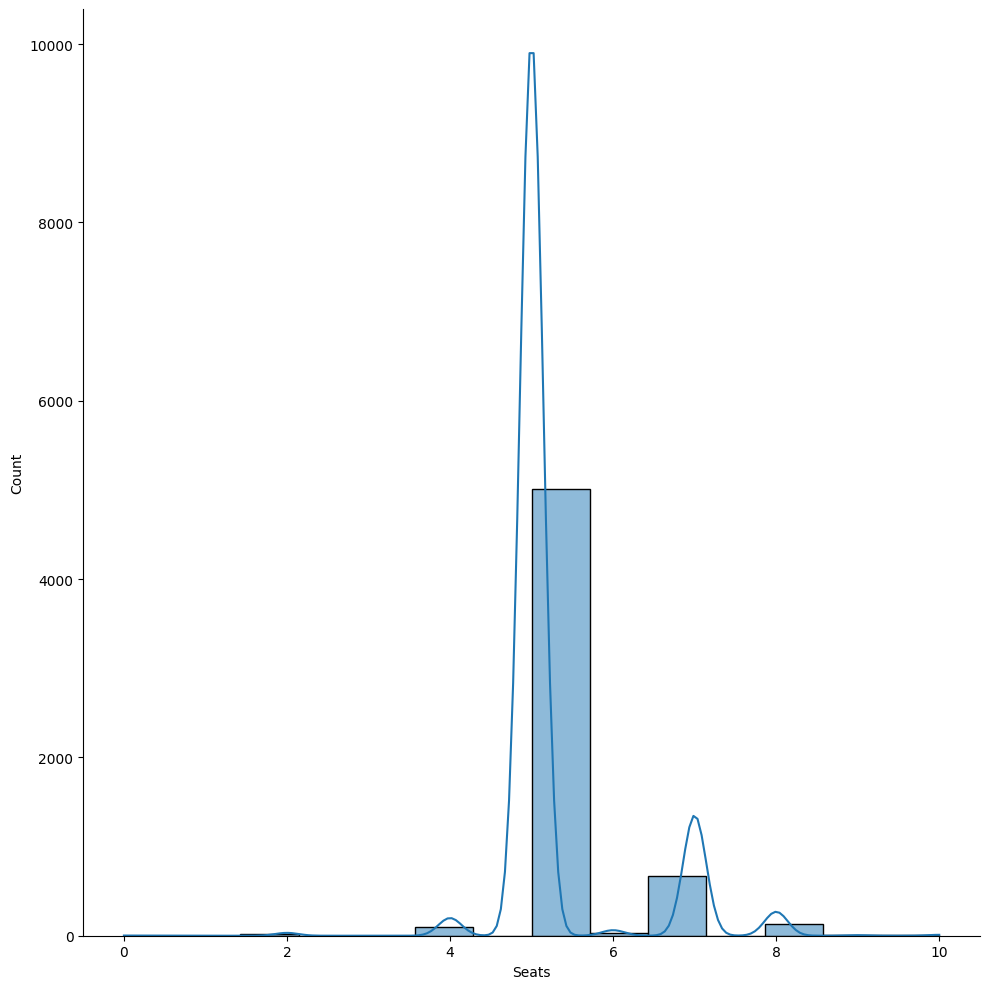

In [20]:
sns.displot(data=data.Seats, kde=True, height=10)
plt.show()

Zero Skewed

<h4>Replacing NaN values with the mean value</h4>

In [21]:
data["Mileage"].fillna(data["Mileage"].astype("float64").mean(), inplace = True)
data["Engine"].fillna(data["Engine"].astype("float64").mean(), inplace = True)
data["Power"].fillna(data["Engine"].astype("float64").mean(), inplace = True)
data["Seats"].fillna(data["Engine"].astype("float64").mean(), inplace = True)

In [22]:
data.isna().sum()

Name                 0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Finally, there's no missing value in our dataset.

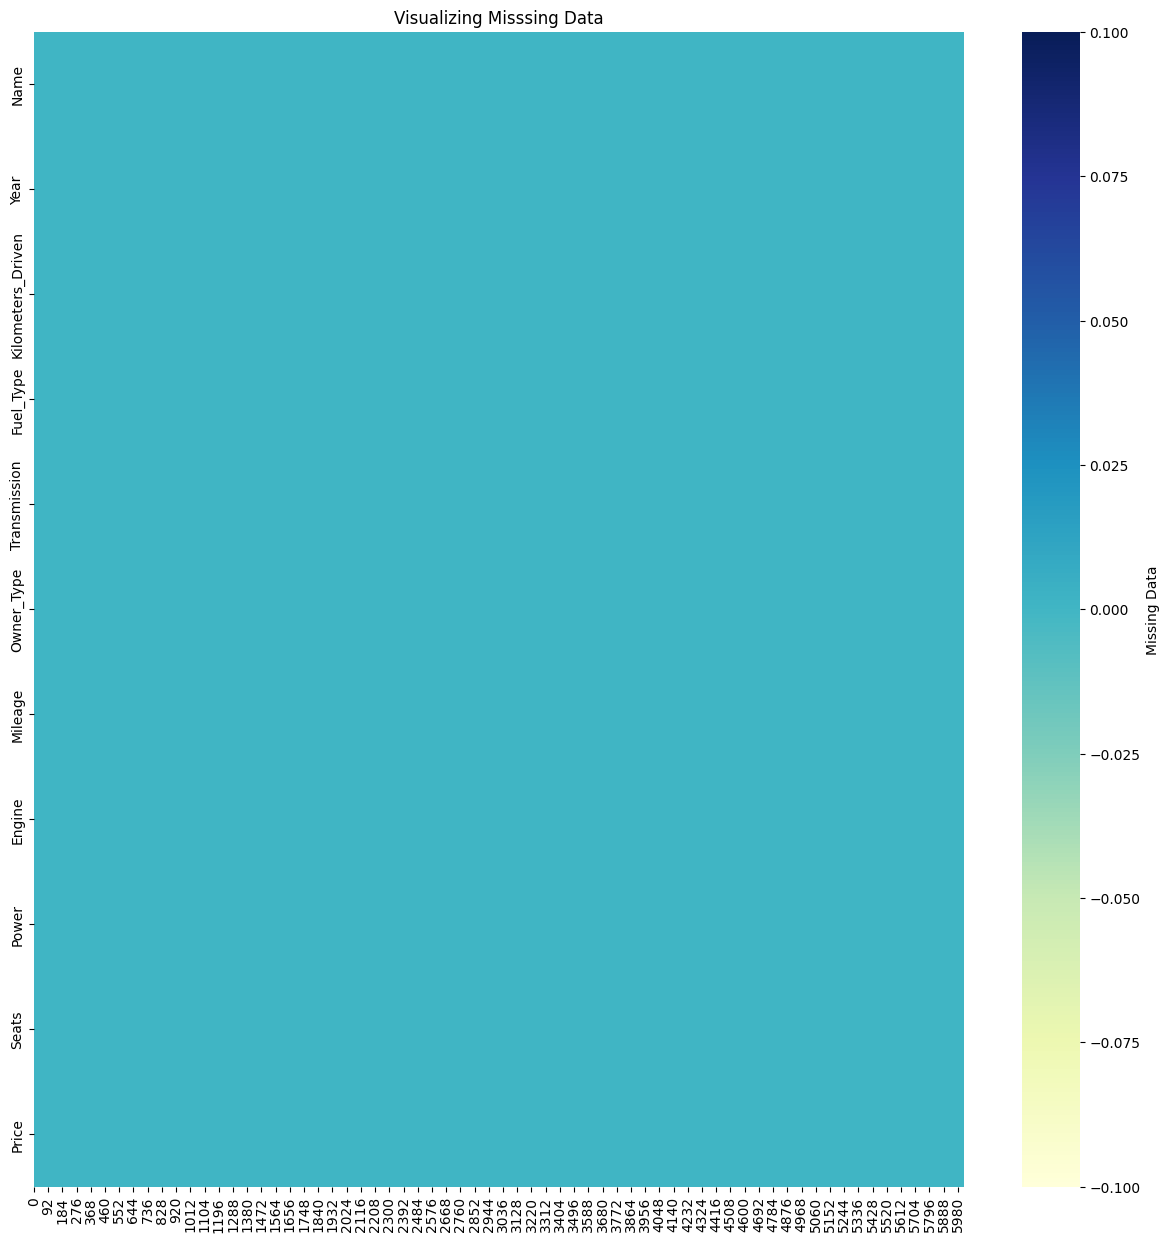

In [23]:
plt.figure(figsize=(15, 15))
plt.title("Visualizing Misssing Data")
sns.heatmap(data.isna().transpose(), cmap="YlGnBu", cbar_kws={"label": "Missing Data"})
plt.show()

In [24]:
data

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,"$2,113.53"
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,"$15,096.62"
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,"$5,434.78"
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,"$7,246.38"
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,"$21,425.12"
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,"$5,736.72"
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,"$4,830.92"
6016,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,"$3,502.42"
6017,Maruti Wagon R VXI,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,"$3,200.48"


<h4>Dropping duplicate values</h4>

In [25]:
data.drop_duplicates(inplace=True)

In [26]:
data

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,"$2,113.53"
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,"$15,096.62"
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,"$5,434.78"
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,"$7,246.38"
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,"$21,425.12"
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,"$5,736.72"
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,"$4,830.92"
6016,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,"$3,502.42"
6017,Maruti Wagon R VXI,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,"$3,200.48"


In [27]:
def car_brand(name):
    return " ".join(name.split()[:2])

In [28]:
data['Model'] = data["Name"].apply(car_brand)

In [29]:
data

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,"$2,113.53",Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,"$15,096.62",Hyundai Creta
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,"$5,434.78",Honda Jazz
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,"$7,246.38",Maruti Ertiga
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,"$21,425.12",Audi A4
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,"$5,736.72",Maruti Swift
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,"$4,830.92",Hyundai Xcent
6016,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,"$3,502.42",Mahindra Xylo
6017,Maruti Wagon R VXI,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,"$3,200.48",Maruti Wagon


In [30]:
# len(list(set(manufacturer[:2])))

In [31]:
col = data.pop("Model")
data.insert(1, "Model", col)

In [32]:
data

,Name,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti Wagon,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,"$2,113.53"
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai Creta,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,"$15,096.62"
2,Honda Jazz V,Honda Jazz,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,"$5,434.78"
3,Maruti Ertiga VDI,Maruti Ertiga,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,"$7,246.38"
4,Audi A4 New 2.0 TDI Multitronic,Audi A4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,"$21,425.12"
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Maruti Swift,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,"$5,736.72"
6015,Hyundai Xcent 1.1 CRDi S,Hyundai Xcent,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,"$4,830.92"
6016,Mahindra Xylo D4 BSIV,Mahindra Xylo,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,"$3,502.42"
6017,Maruti Wagon R VXI,Maruti Wagon,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,"$3,200.48"


In [33]:
data.shape

(6019, 12)

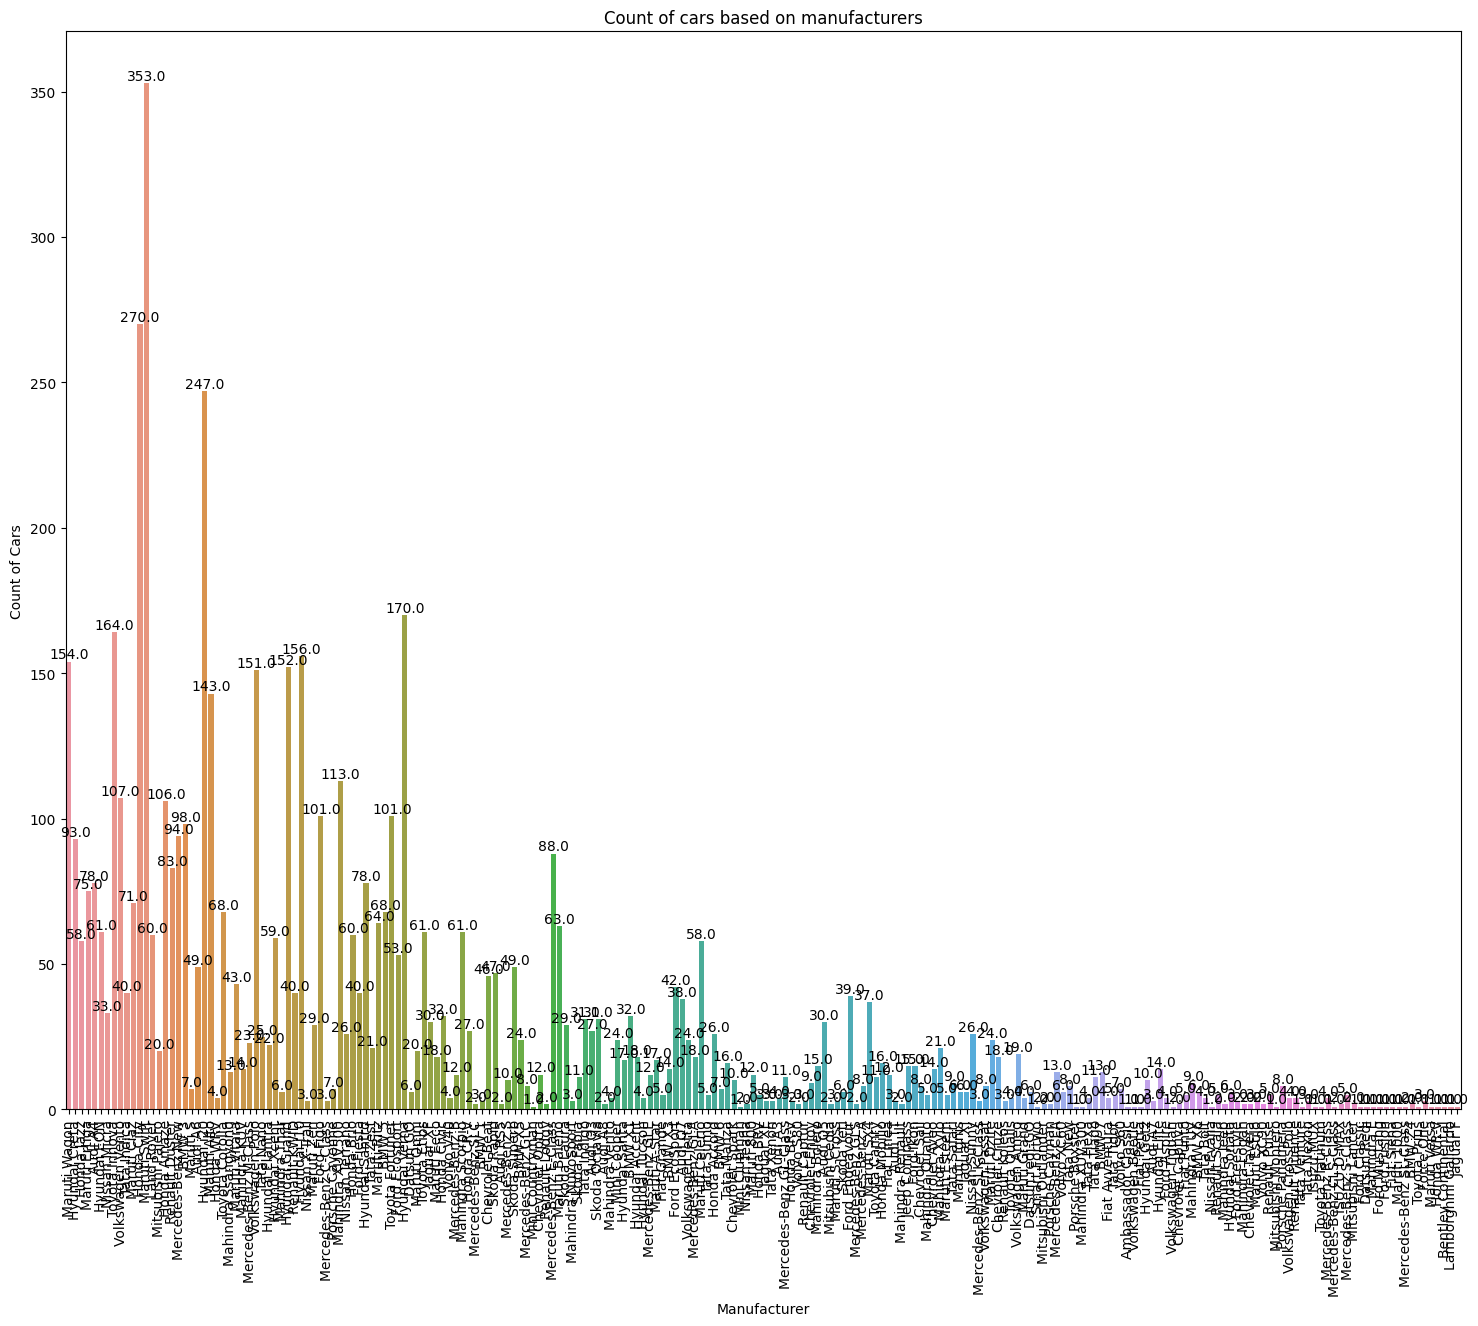

In [34]:
plt.figure(figsize= (18,14))
plot = sns.countplot(x="Model", data=data)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2.0, p.get_height()),
    ha="center",
    va="center",
    xytext=(0,5),
    textcoords = "offset points")
    
    plt.title("Count of cars based on manufacturers")
    plt.xlabel("Manufacturer")
    plt.ylabel("Count of Cars")
plt.show()

Dropping Name column

In [35]:
data.drop("Name", axis = 1, inplace = True)

Since, Year has no significance until we extract how old is the car.

In [36]:
z = data.Year

In [37]:
z

0       2010
1       2015
2       2011
3       2012
4       2013
        ... 
6014    2014
6015    2015
6016    2012
6017    2013
6018    2011
Name: Year, Length: 6019, dtype: int64

In [38]:
curr_time = datetime.datetime.now()
data["Year"]= data["Year"].apply(lambda z : curr_time.year-z)

In [39]:
data["Year"]

0       13
1        8
2       12
3       11
4       10
        ..
6014     9
6015     8
6016    11
6017    10
6018    12
Name: Year, Length: 6019, dtype: int64

In [40]:
data

,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,13,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,"$2,113.53"
1,Hyundai Creta,8,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,"$15,096.62"
2,Honda Jazz,12,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,"$5,434.78"
3,Maruti Ertiga,11,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,"$7,246.38"
4,Audi A4,10,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,"$21,425.12"
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift,9,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,"$5,736.72"
6015,Hyundai Xcent,8,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,"$4,830.92"
6016,Mahindra Xylo,11,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,"$3,502.42"
6017,Maruti Wagon,10,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,"$3,200.48"


In [41]:
import re

def remove_currency_symbol(s):
    # Use regular expression to remove any currency symbol
    return re.sub(r'[$,]', '', s)
data['Price'] = data['Price'].apply(remove_currency_symbol)

In [42]:
data

,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,13,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,2113.53
1,Hyundai Creta,8,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,15096.62
2,Honda Jazz,12,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,5434.78
3,Maruti Ertiga,11,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,7246.38
4,Audi A4,10,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,21425.12
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift,9,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,5736.72
6015,Hyundai Xcent,8,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4830.92
6016,Mahindra Xylo,11,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,3502.42
6017,Maruti Wagon,10,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,3200.48


In [43]:
data["Model"].value_counts

<bound method IndexOpsMixin.value_counts of 0         Maruti Wagon
1        Hyundai Creta
2           Honda Jazz
3        Maruti Ertiga
4              Audi A4
             ...      
6014      Maruti Swift
6015     Hyundai Xcent
6016     Mahindra Xylo
6017      Maruti Wagon
6018    Chevrolet Beat
Name: Model, Length: 6019, dtype: object>

In [44]:

# from sklearn.preprocessing import OneHotEncoder

# #creating instance of one-hot-encoder
# encoder = OneHotEncoder(handle_unknown='ignore')

# #perform one-hot encoding on '' column 
# encoder_data = pd.DataFrame(encoder.fit_transform(data[['Manufacturer']]).toarray())

# #merge one-hot encoded columns back with original DataFrame
# final_df = data.join(encoder_data)

# #view final df
# print(final_df)

In [45]:
# final_df.corr()

In [46]:
Models = data["Model"].unique()
Models

array(['Maruti Wagon', 'Hyundai Creta', 'Honda Jazz', 'Maruti Ertiga',
       'Audi A4', 'Hyundai EON', 'Nissan Micra', 'Toyota Innova',
       'Volkswagen Vento', 'Tata Indica', 'Maruti Ciaz', 'Honda City',
       'Maruti Swift', 'Land Rover', 'Mitsubishi Pajero', 'Honda Amaze',
       'Renault Duster', 'Mercedes-Benz New', 'BMW 3', 'Maruti S',
       'Audi A6', 'Hyundai i20', 'Maruti Alto', 'Honda WRV',
       'Toyota Corolla', 'Mahindra Ssangyong', 'Maruti Vitara',
       'Mahindra KUV', 'Mercedes-Benz M-Class', 'Volkswagen Polo',
       'Tata Nano', 'Hyundai Elantra', 'Hyundai Xcent', 'Mahindra Thar',
       'Hyundai Grand', 'Renault KWID', 'Hyundai i10', 'Nissan X-Trail',
       'Maruti Zen', 'Ford Figo', 'Mercedes-Benz C-Class',
       'Porsche Cayenne', 'Mahindra XUV500', 'Nissan Terrano',
       'Honda Brio', 'Ford Fiesta', 'Hyundai Santro', 'Tata Zest',
       'Maruti Ritz', 'BMW 5', 'Toyota Fortuner', 'Ford Ecosport',
       'Hyundai Verna', 'Datsun GO', 'Maruti Omni', 'Toyot

In [47]:
data["Price"].median()

6811.59

In [48]:
sortedmodel={}
for Model in Models: 
    avg = data[data['Model']==Model]['Price'].median()
    if Model not in sortedmodel.keys():
        sortedmodel[Model] = avg

In [49]:
sortedmodel

{'Maruti Wagon': 3472.2250000000004,
 'Hyundai Creta': 15096.62,
 'Honda Jazz': 7493.96,
 'Maruti Ertiga': 8333.33,
 'Audi A4': 21582.125,
 'Hyundai EON': 3623.19,
 'Nissan Micra': 3623.19,
 'Toyota Innova': 14112.32,
 'Volkswagen Vento': 5905.8,
 'Tata Indica': 2385.2650000000003,
 'Maruti Ciaz': 9057.97,
 'Honda City': 6751.205,
 'Maruti Swift': 5615.94,
 'Land Rover': 42270.53,
 'Mitsubishi Pajero': 14329.71,
 'Honda Amaze': 5615.94,
 'Renault Duster': 7850.24,
 'Mercedes-Benz New': 20682.365,
 'BMW 3': 19202.9,
 'Maruti S': 9541.06,
 'Audi A6': 26038.65,
 'Hyundai i20': 5978.26,
 'Maruti Alto': 3140.1,
 'Honda WRV': 10984.3,
 'Toyota Corolla': 7373.1900000000005,
 'Mahindra Ssangyong': 12741.55,
 'Maruti Vitara': 10929.95,
 'Mahindra KUV': 6250.0,
 'Mercedes-Benz M-Class': 36171.5,
 'Volkswagen Polo': 5253.62,
 'Tata Nano': 2028.99,
 'Hyundai Elantra': 10229.470000000001,
 'Hyundai Xcent': 5676.33,
 'Mahindra Thar': 11086.96,
 'Hyundai Grand': 6086.96,
 'Renault KWID': 4106.28,
 'H

In [50]:
sortedmodel.items()

dict_items([('Maruti Wagon', 3472.2250000000004), ('Hyundai Creta', 15096.62), ('Honda Jazz', 7493.96), ('Maruti Ertiga', 8333.33), ('Audi A4', 21582.125), ('Hyundai EON', 3623.19), ('Nissan Micra', 3623.19), ('Toyota Innova', 14112.32), ('Volkswagen Vento', 5905.8), ('Tata Indica', 2385.2650000000003), ('Maruti Ciaz', 9057.97), ('Honda City', 6751.205), ('Maruti Swift', 5615.94), ('Land Rover', 42270.53), ('Mitsubishi Pajero', 14329.71), ('Honda Amaze', 5615.94), ('Renault Duster', 7850.24), ('Mercedes-Benz New', 20682.365), ('BMW 3', 19202.9), ('Maruti S', 9541.06), ('Audi A6', 26038.65), ('Hyundai i20', 5978.26), ('Maruti Alto', 3140.1), ('Honda WRV', 10984.3), ('Toyota Corolla', 7373.1900000000005), ('Mahindra Ssangyong', 12741.55), ('Maruti Vitara', 10929.95), ('Mahindra KUV', 6250.0), ('Mercedes-Benz M-Class', 36171.5), ('Volkswagen Polo', 5253.62), ('Tata Nano', 2028.99), ('Hyundai Elantra', 10229.470000000001), ('Hyundai Xcent', 5676.33), ('Mahindra Thar', 11086.96), ('Hyundai 

In [51]:
sorted_model = {k:round(v, 2) for k,v in sorted(sortedmodel.items(), key = lambda item: item[1])}

In [52]:
model_order = {Model: i+1 for i, Model in enumerate(sorted_model.keys())}

In [53]:
model_order

{'Fiat Siena': 1,
 'Maruti 800': 2,
 'Maruti Esteem': 3,
 'Fiat Petra': 4,
 'Maruti 1000': 5,
 'Maruti Zen': 6,
 'Maruti Versa': 7,
 'Chevrolet Aveo': 8,
 'Ambassador Classic': 9,
 'Ford Ikon': 10,
 'Chevrolet Spark': 11,
 'Tata Nano': 12,
 'Hyundai Santro': 13,
 'Mahindra Logan': 14,
 'Maruti Estilo': 15,
 'Hyundai Getz': 16,
 'Hyundai Accent': 17,
 'Tata Indica': 18,
 'Mitsubishi Lancer': 19,
 'Fiat Grande': 20,
 'Maruti A-Star': 21,
 'Skoda Fabia': 22,
 'Tata Indigo': 23,
 'Mahindra Renault': 24,
 'Maruti Omni': 25,
 'Chevrolet Beat': 26,
 'Ford Fiesta': 27,
 'Chevrolet Optra': 28,
 'Tata Venture': 29,
 'Fiat Linea': 30,
 'Maruti Alto': 31,
 'Fiat Punto': 32,
 'Tata Manza': 33,
 'Maruti Wagon': 34,
 'Hyundai i10': 35,
 'Hyundai EON': 36,
 'Nissan Micra': 37,
 'Honda Civic': 38,
 'Smart Fortwo': 39,
 'Ford Classic': 40,
 'Ford Fusion': 41,
 'Datsun redi-GO': 42,
 'Datsun GO': 43,
 'Datsun Redi': 44,
 'Chevrolet Sail': 45,
 'Mahindra Verito': 46,
 'Maruti SX4': 47,
 'Ford Figo': 48,
 

In [54]:
data['Model']=data['Model'].map(model_order)

In [55]:
data

,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,34,13,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,2113.53
1,148,8,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,15096.62
2,99,12,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,5434.78
3,109,11,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,7246.38
4,162,10,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,21425.12
...,...,...,...,...,...,...,...,...,...,...,...
6014,71,9,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,5736.72
6015,73,8,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4830.92
6016,68,11,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,3502.42
6017,34,10,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,3200.48


In [56]:
# number = LabelEncoder()
# data["Manufacturer"]=number.fit_transform(data["Manufacturer"].astype(str))
# data

In [57]:
target_category = data['Owner_Type'].unique()
print(target_category)

['First' 'Second' 'Fourth & Above' 'Third']


In [58]:
target_category = data['Fuel_Type'].unique()
print(target_category)

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


In [59]:
target_category=data['Transmission'].unique()
print(target_category)

['Manual' 'Automatic']


In [60]:

from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['First', 'Second','Third','Fourth & Above'],['Manual','Automatic'], ['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']])
oe

OrdinalEncoder(categories=[['First', 'Second', 'Third', 'Fourth & Above'],
                           ['Manual', 'Automatic'],
                           ['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']])

In [61]:
oe = OrdinalEncoder(categories=[['First', 'Second','Third','Fourth & Above'],['Manual','Automatic'], ['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']])
oe

OrdinalEncoder(categories=[['First', 'Second', 'Third', 'Fourth & Above'],
                           ['Manual', 'Automatic'],
                           ['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']])

In [62]:
oe.fit(data[['Owner_Type','Transmission', 'Fuel_Type']])

OrdinalEncoder(categories=[['First', 'Second', 'Third', 'Fourth & Above'],
                           ['Manual', 'Automatic'],
                           ['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']])

In [63]:

data_transformed = oe.transform(data[['Owner_Type', 'Transmission', 'Fuel_Type']])

In [64]:
data_transformed= pd.DataFrame(data_transformed, columns=['Owner_Type_Transformed', 'Transmission_Transformed', 'Fuel_Transformed'])

In [65]:
data = data.merge(data_transformed, left_index=True, right_index=True)

In [66]:
data

,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Owner_Type_Transformed,Transmission_Transformed,Fuel_Transformed
0,34,13,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,2113.53,0.0,0.0,0.0
1,148,8,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,15096.62,0.0,0.0,1.0
2,99,12,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,5434.78,0.0,0.0,2.0
3,109,11,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,7246.38,0.0,0.0,1.0
4,162,10,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,21425.12,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,71,9,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,5736.72,0.0,0.0,1.0
6015,73,8,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4830.92,0.0,0.0,1.0
6016,68,11,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,3502.42,1.0,0.0,1.0
6017,34,10,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,3200.48,0.0,0.0,2.0


In [67]:
data.drop("Transmission", axis = 1, inplace = True)
data.drop("Owner_Type", axis = 1, inplace = True)
data.drop("Fuel_Type", axis = 1, inplace = True)

In [68]:
col = data.pop("Owner_Type_Transformed")
data.insert(5, "Owner_Type_Transformed", col)

In [69]:
col = data.pop("Transmission_Transformed")
data.insert(6, "Transmission_Transformed", col)

In [70]:
col = data.pop("Fuel_Transformed")
data.insert(7, "Fuel_Transformed", col)

In [71]:
data.isna().sum()

Model                       0
Year                        0
Kilometers_Driven           0
Mileage                     0
Engine                      0
Owner_Type_Transformed      0
Transmission_Transformed    0
Fuel_Transformed            0
Power                       0
Seats                       0
Price                       0
dtype: int64

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Model                     6019 non-null   int64  
 1   Year                      6019 non-null   int64  
 2   Kilometers_Driven         6019 non-null   int64  
 3   Mileage                   6019 non-null   float64
 4   Engine                    6019 non-null   float64
 5   Owner_Type_Transformed    6019 non-null   float64
 6   Transmission_Transformed  6019 non-null   float64
 7   Fuel_Transformed          6019 non-null   float64
 8   Power                     6019 non-null   float64
 9   Seats                     6019 non-null   float64
 10  Price                     6019 non-null   object 
dtypes: float64(7), int64(3), object(1)
memory usage: 693.3+ KB


In [73]:
data["Price"] = data["Price"].astype(float)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Model                     6019 non-null   int64  
 1   Year                      6019 non-null   int64  
 2   Kilometers_Driven         6019 non-null   int64  
 3   Mileage                   6019 non-null   float64
 4   Engine                    6019 non-null   float64
 5   Owner_Type_Transformed    6019 non-null   float64
 6   Transmission_Transformed  6019 non-null   float64
 7   Fuel_Transformed          6019 non-null   float64
 8   Power                     6019 non-null   float64
 9   Seats                     6019 non-null   float64
 10  Price                     6019 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 693.3 KB


In [75]:
data.corr()

,Model,Year,Kilometers_Driven,Mileage,Engine,Owner_Type_Transformed,Transmission_Transformed,Fuel_Transformed,Power,Seats,Price
Model,1.000000,-0.235898,0.010923,-0.370166,0.764010,-0.067888,0.589002,-0.409303,0.058986,-0.025274,0.739011
Year,-0.235898,1.000000,0.173048,-0.321534,0.051712,0.397152,-0.097059,0.130269,0.222846,0.104341,-0.305327
Kilometers_Driven,0.010923,0.173048,1.000000,-0.065253,0.091029,0.085337,-0.025663,-0.098833,0.036156,0.009383,-0.011493
Mileage,-0.370166,-0.321534,-0.065253,1.000000,-0.588354,-0.161176,-0.333096,-0.164196,-0.303653,-0.117514,-0.306588
Engine,0.764010,0.051712,0.091029,-0.588354,1.000000,0.050454,0.499082,-0.381640,0.150303,0.000355,0.657118
Owner_Type_Transformed,-0.067888,0.397152,0.085337,-0.161176,0.050454,1.000000,-0.008797,0.041949,0.105812,0.059042,-0.097557
Transmission_Transformed,0.589002,-0.097059,-0.025663,-0.333096,0.499082,-0.008797,1.000000,-0.113006,0.085744,-0.013713,0.586025
Fuel_Transformed,-0.409303,0.130269,-0.098833,-0.164196,-0.381640,0.041949,-0.113006,1.000000,-0.006380,0.048265,-0.289585
Power,0.058986,0.222846,0.036156,-0.303653,0.150303,0.105812,0.085744,-0.006380,1.000000,0.497607,0.104474
Seats,-0.025274,0.104341,0.009383,-0.117514,0.000355,0.059042,-0.013713,0.048265,0.497607,1.000000,-0.024541


In [76]:
# data.drop(["Seats"], axis = 1, inplace = True)

In [77]:
# data.drop(["Kilometers_Driven"], axis = 1, inplace = True)

In [78]:
data

,Model,Year,Kilometers_Driven,Mileage,Engine,Owner_Type_Transformed,Transmission_Transformed,Fuel_Transformed,Power,Seats,Price
0,34,13,72000,26.60,998.0,0.0,0.0,0.0,58.16,5.0,2113.53
1,148,8,41000,19.67,1582.0,0.0,0.0,1.0,126.20,5.0,15096.62
2,99,12,46000,18.20,1199.0,0.0,0.0,2.0,88.70,5.0,5434.78
3,109,11,87000,20.77,1248.0,0.0,0.0,1.0,88.76,7.0,7246.38
4,162,10,40670,15.20,1968.0,1.0,1.0,1.0,140.80,5.0,21425.12
...,...,...,...,...,...,...,...,...,...,...,...
6014,71,9,27365,28.40,1248.0,0.0,0.0,1.0,74.00,5.0,5736.72
6015,73,8,100000,24.40,1120.0,0.0,0.0,1.0,71.00,5.0,4830.92
6016,68,11,55000,14.00,2498.0,1.0,0.0,1.0,112.00,8.0,3502.42
6017,34,10,46000,18.90,998.0,0.0,0.0,2.0,67.10,5.0,3200.48


In [79]:
data["Model"].unique()

array([ 34, 148,  99, 109, 162,  36,  37, 144,  76,  18, 118,  85,  71,
       192, 145,  72, 104, 159, 154, 123, 171,  77,  31, 134,  98, 140,
       133,  82, 187,  67,  12, 131,  73, 136,  79,  49,  35, 122,   6,
        48, 194, 197, 138, 100,  54,  27,  13,  69,  55, 173, 157, 105,
        89,  43,  25,  63, 183,  57,  38, 169, 146, 102,  83, 214, 158,
        26,  93, 196, 170, 119, 201, 205, 175,  28, 121, 174, 110,  74,
       115,  22,  23, 172, 141, 184,  46, 179, 150, 161,  17, 143, 210,
        21,  20, 188, 125, 198, 108, 177,  62,  75,  80, 203,  33,  11,
       193,  90,   2, 137, 195,  94, 164, 199, 132, 135, 152,  65,  84,
       190,  50, 124, 112, 178, 213, 156,  47, 165,  86,  30, 185,  24,
       163,  10,  45,  51,   8,  68,   3, 128,  95, 212,  61, 206, 103,
        92, 101, 126,  52,  91, 113,  42,  39, 116, 200, 181, 160,  53,
       211, 114, 153,  78, 191,  97, 106, 166,   9, 155,   4,  16, 182,
       117, 107, 180,  56,  32, 129, 204,  70,  58,  59,  66,  8

<h1>Model Training</h1>

Using <b>Linear Regression</b>, <b>Lasso Regression</b>, <b>Ridge Regression</b>, <b>Baggging Regression</b>, and <b>Random Forest Regression</b> to train the model. 

Let's split the dataset into train and test set.

In [80]:
data

,Model,Year,Kilometers_Driven,Mileage,Engine,Owner_Type_Transformed,Transmission_Transformed,Fuel_Transformed,Power,Seats,Price
0,34,13,72000,26.60,998.0,0.0,0.0,0.0,58.16,5.0,2113.53
1,148,8,41000,19.67,1582.0,0.0,0.0,1.0,126.20,5.0,15096.62
2,99,12,46000,18.20,1199.0,0.0,0.0,2.0,88.70,5.0,5434.78
3,109,11,87000,20.77,1248.0,0.0,0.0,1.0,88.76,7.0,7246.38
4,162,10,40670,15.20,1968.0,1.0,1.0,1.0,140.80,5.0,21425.12
...,...,...,...,...,...,...,...,...,...,...,...
6014,71,9,27365,28.40,1248.0,0.0,0.0,1.0,74.00,5.0,5736.72
6015,73,8,100000,24.40,1120.0,0.0,0.0,1.0,71.00,5.0,4830.92
6016,68,11,55000,14.00,2498.0,1.0,0.0,1.0,112.00,8.0,3502.42
6017,34,10,46000,18.90,998.0,0.0,0.0,2.0,67.10,5.0,3200.48


In [81]:
x = data.iloc[:, :-1]

In [82]:
x.isnull().values.any()

False

In [83]:
y = data.iloc[:, 10]

In [84]:
y.isnull().values.any()

False

In [85]:
x

,Model,Year,Kilometers_Driven,Mileage,Engine,Owner_Type_Transformed,Transmission_Transformed,Fuel_Transformed,Power,Seats
0,34,13,72000,26.60,998.0,0.0,0.0,0.0,58.16,5.0
1,148,8,41000,19.67,1582.0,0.0,0.0,1.0,126.20,5.0
2,99,12,46000,18.20,1199.0,0.0,0.0,2.0,88.70,5.0
3,109,11,87000,20.77,1248.0,0.0,0.0,1.0,88.76,7.0
4,162,10,40670,15.20,1968.0,1.0,1.0,1.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...
6014,71,9,27365,28.40,1248.0,0.0,0.0,1.0,74.00,5.0
6015,73,8,100000,24.40,1120.0,0.0,0.0,1.0,71.00,5.0
6016,68,11,55000,14.00,2498.0,1.0,0.0,1.0,112.00,8.0
6017,34,10,46000,18.90,998.0,0.0,0.0,2.0,67.10,5.0


In [86]:
y

0        2113.53
1       15096.62
2        5434.78
3        7246.38
4       21425.12
          ...   
6014     5736.72
6015     4830.92
6016     3502.42
6017     3200.48
6018     3019.32
Name: Price, Length: 6019, dtype: float64

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=40)

In [88]:
Y_train

2899    17512.08
4477     4227.05
5525    42270.53
5629    10567.63
3374    10748.79
          ...   
5959     4830.92
3340     5132.85
5426     1570.05
3064     7234.30
3398    29287.44
Name: Price, Length: 4815, dtype: float64

In [89]:
X_train.shape

(4815, 10)

In [90]:
data.to_csv("preprocessed_data", index = False)

<h3>Finally, scaling the data.</h3>

In [91]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_scaled = standardScaler.transform(X_train)
X_test_scaled = standardScaler.transform(X_test)

In [92]:
# data['Price'] = data['Price'].apply(lambda x: float(x))

In [93]:
# np.any(np.isnan(X_train))

In [94]:
# print(type(X_train))
# X_train[np.logical_not(np.isnan(X_train))]
# X_train
# # check_nan = []
# # for _array in X_train:
# #    nan_found = list(map(lambda x: True if x == np.nan else False, _array))
# #    check_nan.extend(nan_found)
# # print(nan_found.count(True))

<h3>Training the data in Linear Regression.</h3>

In [95]:
linearRegression = LinearRegression()
linearRegression.fit(X_train_scaled, Y_train)
y_pred = linearRegression.predict(X_test_scaled)
r2_score(Y_test, y_pred)


0.6354654899259813

In [96]:
y_pred

array([11053.88076855,  7875.27056894, 14635.23061385, ...,
       15734.9643449 , 10932.52926388, 10123.9360756 ])

In [97]:
scores = cross_val_score(linearRegression, X_train_scaled, Y_train, cv=5)
print("Cross Validation Score:", scores)

Cross Validation Score: [0.66668896 0.63373418 0.31838931 0.58369439 0.69184092]


In [98]:
print("%0.2f Accuracy" %(scores.mean()))
print("And Standard Deviation of %0.2f" %(scores.std())) 

0.58 Accuracy
And Standard Deviation of 0.14


In [99]:
mse = mean_squared_error(Y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Square Error", mse)
print("Root Mean Square Error", rmse)
print("Mean Absolute Error", mae)

Mean Square Error 67370068.91311675
Root Mean Square Error 8207.927199550246
Mean Absolute Error 4893.039127143698


<h3>Training the data in Lasso Regression.</h3>

In [100]:
lassoRegression = Lasso()
lassoRegression.fit(X_train_scaled, Y_train)
y_pred = lassoRegression.predict(X_test_scaled)
r2_score(Y_test, y_pred)

0.6354740654642186

In [101]:
y_pred

array([11054.18361279,  7874.17152813, 14634.20228182, ...,
       15732.12173495, 10932.11145597, 10124.34248228])

In [102]:
scores = cross_val_score(lassoRegression, X_train_scaled, Y_train, cv=5)
print("Cross Validation Score:", scores)

Cross Validation Score: [0.66669042 0.63376715 0.31975879 0.58376254 0.69185637]


In [103]:
print("%0.2f Accuracy" %(scores.mean()))
print("And Standard Deviation of %0.2f" %(scores.std())) 

0.58 Accuracy
And Standard Deviation of 0.13


In [104]:
mse = mean_squared_error(Y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Square Error", mse)
print("Root Mean Square Error", rmse)
print("Mean Absolute Error", mae)

Mean Square Error 67368484.05740064
Root Mean Square Error 8207.830654771127
Mean Absolute Error 4892.533737141513


<h3>Training the data in Ridge Regression.</h3>

In [105]:
ridgeRegression = Ridge()
ridgeRegression.fit(X_train_scaled, Y_train)
y_pred = ridgeRegression.predict(X_test_scaled)
r2_score(Y_test, y_pred)


0.6354676251316308

In [106]:
y_pred

array([11053.02437419,  7874.94549715, 14634.466205  , ...,
       15734.41169819, 10932.35537283, 10124.82285606])

In [107]:
scores = cross_val_score(ridgeRegression, X_train_scaled, Y_train, cv=5)
print("Cross Validation Score:", scores)

Cross Validation Score: [0.66668225 0.63375465 0.31970695 0.58373912 0.69185134]


In [108]:
print("%0.2f Accuracy" %(scores.mean()))
print("And Standard Deviation of %0.2f" %(scores.std())) 

0.58 Accuracy
And Standard Deviation of 0.13


In [109]:
mse = mean_squared_error(Y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Square Error", mse)
print("Root Mean Square Error", rmse)
print("Mean Absolute Error", mae)

Mean Square Error 67369674.30314767
Root Mean Square Error 8207.903161170194
Mean Absolute Error 4892.662924202929


<h3>Training the data in Bagging Regression.</h3>

In [150]:
baggingRegression = BaggingRegressor(n_estimators = 100)
baggingRegression.fit(X_train_scaled, Y_train)
y_pred = baggingRegression.predict(X_test_scaled)
r2_score(Y_test, y_pred)

0.902261695623118

In [151]:
scores = cross_val_score(baggingRegression, X_train_scaled, Y_train, cv=5)
print("Cross Validation Score:", scores)

Cross Validation Score: [0.92570499 0.93109176 0.90919519 0.81149742 0.91089081]


In [152]:
print("%0.2f Accuracy" %(scores.mean()))
print("And Standard Deviation of %0.2f" %(scores.std())) 

0.90 Accuracy
And Standard Deviation of 0.04


In [153]:
mse = mean_squared_error(Y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Square Error", mse)
print("Root Mean Square Error", rmse)
print("Mean Absolute Error", mae)

Mean Square Error 18063135.64108021
Root Mean Square Error 4250.074780645655
Mean Absolute Error 1790.6322133972076


<h3>Training the data in Random Forest Regression.</h3>

In [114]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train_scaled, Y_train)
y_pred = rf.predict(X_test_scaled)
r2_score(Y_test, y_pred)

0.9077681144249627

In [115]:
y_pred

array([ 7638.0436,  5190.822 , 10026.2066, ...,  6167.0291,  8667.1488,
        5144.9291])

In [116]:
scores = cross_val_score(rf, X_train_scaled, Y_train, cv=5)
print("Cross Validation Score:", scores)

Cross Validation Score: [0.92687877 0.93307447 0.90870053 0.81690661 0.90505366]


In [117]:
print("%0.2f Accuracy" %(scores.mean()))
print("And Standard Deviation of %0.2f" %(scores.std())) 

0.90 Accuracy
And Standard Deviation of 0.04


In [118]:
mse = mean_squared_error(Y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Square Error", mse)
print("Root Mean Square Error", rmse)
print("Mean Absolute Error", mae)

Mean Square Error 17045487.643722057
Root Mean Square Error 4128.618127621161
Mean Absolute Error 1762.7113685229792


In [119]:
Y_test

3193     9057.97
5496     5132.85
2275    10205.31
5305    26557.97
2286     9154.59
          ...   
1074    10543.48
5051     1992.75
4688     9927.54
2227     8007.25
3835     5289.86
Name: Price, Length: 1204, dtype: float64

In [120]:
# #for a single car
# rf.predict(standardScaler.transform(X_test.iloc[-1].values.reshape(1,-1)))[0]

In [121]:
# MSE = np.square(np.subtract(Y_test, y_pred)).mean()
# MSE

In [122]:
# import math
# rmse = math.sqrt(MSE)
# rmse

<h1>Prediction</h1>

In [123]:
conv= standardScaler.transform(np.array([37,10,41000,23.08,1461,0,0,1,63.1,5]).reshape(1,-1))

c:\Users\Swastika\anaconda3\envs\testproject\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [124]:
predicted_price = float(rf.predict(conv))
round(predicted_price, 2)

4023.19

<h2>Model Loading</h2>

In [125]:
# with open('model_pickle', 'wb') as f:
#     pickle.dump(rf, f)

In [126]:
pickle.dump(rf, open("ml_model.sav", "wb"))

In [127]:
# with open('model_pickle', 'rb') as f:
#     mp=pickle.load(f)


In [128]:

# with open('standardscaler_pickle', 'wb') as f:
#     pickle.dump(standardScaler, f)

In [129]:
# with open('standardscaler_pickle', 'rb') as f:
#     sp = pickle.load(f)

In [130]:
# with open('scaler.sav','wb') as f:
#     pickle.dump(standardScaler,f)

In [131]:
pickle.dump(standardScaler, open("scaler.sav", "wb"))

In [132]:
# with open('scaler.sav','rb') as f:
#     scaler = pickle.load(f)

In [133]:
# with open('oencoder_pickle', 'wb') as f:
#     pickle.dump(oe, f)

In [134]:
# with open('oencoder_pickle', 'rb') as f:
#     op= pickle.load(f)

In [135]:
pickle.dump(oe, open("oencoder.sav", "wb"))

In [136]:
# with open('carmodel_pickle', 'wb') as f:
#     pickle.dump(model_order, f)

In [137]:
# with open('carmodel_pickle', 'rb') as f:
#     cp = pickle.load(f)

In [138]:
pickle.dump(model_order, open("carmodel.sav", "wb"))